Reference to API reddit (praw): https://towardsdatascience.com/scraping-reddit-data-1c0af3040768

pushshift: https://medium.com/mcd-unison/using-pushshift-api-for-data-analysis-on-reddit-b08d339c48b8

our api info: https://www.reddit.com/prefs/apps


Dr. Klein Questions to ask:
Are there seasonal trends? Which posts get the most engagement? What topics tend to show up the most and/or get the most engagement and/or appear seasonally? How does Emory reddit compare to GT / GSU / AUC and/or peers like Vanderbilt, Wash U, etc.

Your homework should consist of a Jupyter notebook with the following sections (not necessarily in this order):*

1. A text cell that states the question you’re exploring, including any personal, project-specific definitions of terms requiring clarification (e.g. “change”).
2. A code cell (or cells) with any cleaning required for the method to run. (As above, this does not need to be the only cleaning of the data you ever perform; only what is needed for this initial analysis).
3. A code cell (or cells) with any corpus pre-processing and document segmentation. 
4. A code cell (or cells) with any required tokenization and stop-word removal
5. A code cell (or cells) that implements the method you have chosen to answer the question
6. A text cell that briefly (in a paragraph) interprets the results, and identifies the next steps for your project that are suggested by the results.

* Sections 2-5 are intended as a guide. If your approach requires a different format, you can diverge from the specified cells. But you must include cells 1 and 6 (the research question and the analysis) regardless of the structure of your project code.

Upload your Notebook (the file ending in .ipynb) to Canvas by the date specified above.



**1. Research Question**

What issues promt students to publish on their college's subreddits the most? We will be comparing the submissions and comments on the subreddits of Emory, Georgia Tech, John Hopkins, and Georgia State.

In [ ]:
!git clone https://github.com/mimno/Mallet.git
!sudo apt-get install default-jdk
!sudo apt-get install ant
!cd Mallet/
!ant
mallet_path = '/content/Mallet/bin/mallet'

fatal: destination path 'Mallet' already exists and is not an empty directory.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jdk is already the newest version (2:1.11-68ubuntu1~18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
ant is already the newest version (1.10.5-3~18.04).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
Buildfile: build.xml does not exist!
Build failed


In [ ]:
!pip install psaw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import datetime as dt
import logging
logging.basicConfig(format='%(levelname)s : %(message)s', level=logging.INFO)
logging.root.level = logging.INFO  
import itertools
import numpy as np
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.wrappers import LdaMallet
from google.colab import files, drive
drive.mount('drive')
def tokenize(text):
  return [token for token in simple_preprocess(text) if token not in STOPWORDS]

INFO:summarizer.preprocessing.cleaner:'pattern' package not found; tag filters are not available for English
INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...) from 9 documents (total 29 corpus positions)


Mounted at drive


In [ ]:
dani_filepath = "/content/drive/MyDrive/post_data.csv"
minh_filepath = "post_data.csv"
posts = pd.read_csv(minh_filepath)
def tokenize(text):
  return [token for token in simple_preprocess(text) if token not in STOPWORDS]

def iter_docs(post_list):
  for _, post in post_list.iterrows():
    yield post['id'], tokenize(post['body'])
print("Length of dataset: " + str(len(posts)) + "\nPHASE 2\n\n\n\n\n\n")
outstream = (tokens for _,tokens in iter_docs(posts))
id2word_reddit = gensim.corpora.Dictionary(outstream)
id2word_reddit.filter_extremes(no_below=2, no_above=1.0)
print(id2word_reddit)

class Corpus(object):
    def __init__(self, dump_file, dictionary, clip_docs=None):
        self.dump_file = dump_file
        self.dictionary = dictionary
        self.clip_docs = clip_docs
    
    def __iter__(self):
        self.titles = []
        for title, tokens in itertools.islice(iter_docs(self.dump_file), self.clip_docs):
            self.titles.append(title)
            yield self.dictionary.doc2bow(tokens)
    
    def __len__(self):
        return self.clip_docs
redcorp = Corpus(posts, id2word_reddit)
lda_model = gensim.models.LdaModel(redcorp, num_topics=20, id2word=id2word_reddit, passes=50)

from gensim.corpora import MmCorpus
MmCorpus.serialize('./content/drive/MyDrive/LDAMODEL0/collegereddit.corpus.mm', redcorp)
id2word_reddit.save('./content/drive/MyDrive/LDAMODEL0/collegereddit.dictionary')
lda_model.save('./content/drive/MyDrive/LDAMODEL0/lda_reddit-20topics_5iters.model')


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,5,6,8,17,18,20,37,51) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Length of dataset: 79713
PHASE 2








INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:adding document #10000 to Dictionary(13869 unique tokens: ['better', 'earlier', 'early', 'evening', 'friday']...)
INFO:gensim.corpora.dictionary:adding document #20000 to Dictionary(18790 unique tokens: ['better', 'earlier', 'early', 'evening', 'friday']...)
INFO:gensim.corpora.dictionary:adding document #30000 to Dictionary(24726 unique tokens: ['better', 'earlier', 'early', 'evening', 'friday']...)
INFO:gensim.corpora.dictionary:adding document #40000 to Dictionary(28820 unique tokens: ['better', 'earlier', 'early', 'evening', 'friday']...)
INFO:gensim.corpora.dictionary:adding document #50000 to Dictionary(31181 unique tokens: ['better', 'earlier', 'early', 'evening', 'friday']...)
INFO:gensim.corpora.dictionary:adding document #60000 to Dictionary(32891 unique tokens: ['better', 'earlier', 'early', 'evening', 'friday']...)
INFO:gensim.corpora.dictionary:adding documen

Dictionary(21653 unique tokens: ['better', 'earlier', 'early', 'evening', 'friday']...)


Streaming output truncated to the last 5000 lines.
INFO:gensim.models.ldamodel:topic diff=0.049644, rho=0.115581
INFO:gensim.models.ldamodel:PROGRESS: pass 34, at document #48000/79713
INFO:gensim.models.ldamodel:merging changes from 2000 documents into a model of 79713 documents
INFO:gensim.models.ldamodel:topic #8 (0.050): 0.041*"semester" + 0.041*"classes" + 0.039*"time" + 0.031*"year" + 0.028*"gsu" + 0.022*"class" + 0.020*"week" + 0.017*"day" + 0.017*"hours" + 0.017*"fall"
INFO:gensim.models.ldamodel:topic #14 (0.050): 0.024*"open" + 0.020*"panther" + 0.017*"unfortunately" + 0.016*"phase" + 0.014*"waiting" + 0.012*"technology" + 0.012*"word" + 0.011*"ms" + 0.010*"closed" + 0.010*"curious"
INFO:gensim.models.ldamodel:topic #10 (0.050): 0.030*"like" + 0.027*"know" + 0.022*"think" + 0.018*"going" + 0.014*"way" + 0.013*"ll" + 0.013*"park" + 0.012*"probably" + 0.012*"let" + 0.012*"time"
INFO:gensim.models.ldamodel:topic #13 (0.050): 0.048*"cs" + 0.035*"major" + 0.023*"research" + 0.018*

FileNotFoundError: ignored

In [ ]:
import pandas as pd
!pip install psaw
import psaw
import matplotlib.pyplot as plt
import itertools
import numpy as np
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.wrappers import LdaMallet
from google.colab import files, drive
drive.mount('drive')
def tokenize(text):
  return [token for token in simple_preprocess(text) if token not in STOPWORDS]
lda_model = gensim.models.LdaModel.load('/content/drive/MyDrive/LDAMODEL0/lda_reddit-20topics_50iters.model')
id2word = gensim.corpora.Dictionary.load('/content/drive/MyDrive/LDAMODEL0/collegereddit.dictionary')
posts = pd.read_csv('/content/drive/MyDrive/post_data.csv')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


INFO:gensim.utils:loading LdaModel object from /content/drive/MyDrive/LDAMODEL0/lda_reddit-20topics_50iters.model


Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


INFO:gensim.utils:loading expElogbeta from /content/drive/MyDrive/LDAMODEL0/lda_reddit-20topics_50iters.model.expElogbeta.npy with mmap=None
INFO:gensim.utils:setting ignored attribute id2word to None
INFO:gensim.utils:setting ignored attribute state to None
INFO:gensim.utils:setting ignored attribute dispatcher to None
INFO:gensim.utils:loaded /content/drive/MyDrive/LDAMODEL0/lda_reddit-20topics_50iters.model
INFO:gensim.utils:loading LdaState object from /content/drive/MyDrive/LDAMODEL0/lda_reddit-20topics_50iters.model.state
INFO:gensim.utils:loaded /content/drive/MyDrive/LDAMODEL0/lda_reddit-20topics_50iters.model.state
INFO:gensim.utils:loading Dictionary object from /content/drive/MyDrive/LDAMODEL0/collegereddit.dictionary
INFO:gensim.utils:loaded /content/drive/MyDrive/LDAMODEL0/collegereddit.dictionary
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,5,6,8,17,18,20,37,51) have mixed types.Specify dtype option on import or se

In [ ]:
topics = lda_model.show_topics(20, 15, formatted=False)

for topic in topics:
    topic_num = topic[0]
    topic_words = ""
    
    topic_pairs = topic[1]
    for pair in topic_pairs:
      print(pair)
      topic_words += pair[0] + ", "
    
    print("T" + str(topic_num + 1) + ": " + topic_words[:-2])

('thank', 0.089624554)
('thanks', 0.08468462)
('yes', 0.039357666)
('good', 0.033378437)
('yeah', 0.029747909)
('ll', 0.029712964)
('ur', 0.02058115)
('luck', 0.01760274)
('okay', 0.016935807)
('waitlist', 0.015504482)
('definitely', 0.014124812)
('register', 0.013452093)
('interested', 0.012555193)
('advice', 0.011736327)
('know', 0.011554348)
T1: thank, thanks, yes, good, yeah, ll, ur, luck, okay, waitlist, definitely, register, interested, advice, know, 
('major', 0.046496697)
('cs', 0.032041002)
('courses', 0.020642214)
('classes', 0.017028745)
('research', 0.016213587)
('med', 0.014583064)
('science', 0.014159098)
('pre', 0.013746959)
('math', 0.013655417)
('want', 0.013171735)
('engineering', 0.012942566)
('majors', 0.012718861)
('bme', 0.011292911)
('premed', 0.011093825)
('course', 0.010661757)
T2: major, cs, courses, classes, research, med, science, pre, math, want, engineering, majors, bme, premed, course, 
('food', 0.02101743)
('building', 0.014081414)
('library', 0.01400090

In [ ]:
big_docs = posts.loc[posts['body'].str.len() > 100]
doc_proportions = list() 
for index, doc in big_docs.iterrows():
  text = doc['body']
  tokens = tokenize(text)
  bow = id2word.doc2bow(tokens)
  doc_topics = lda_model.get_document_topics(bow)
  propdict = dict((key, value) for key, value in doc_topics)
  doc_proportions.append(propdict)
big_docs.insert(len(big_docs.columns),"proportions", doc_proportions)

In [ ]:
big_docs.loc[0]['proportions']

{2: 0.0875, 12: 0.32445195, 15: 0.21584515, 16: 0.30553624}

In [ ]:
main_topic = list()
topic_centrality = list()
for _, row in big_docs.iterrows():
  proportions = row['proportions']
  max_topic, max_component = 0, 0
  for topic, component in proportions:
    if component > max_component:
        max_topic, max_component = topic, component
  main_topic.append(max_topic)
  topic_centrality.append(max_component)
big_docs.insert(len(big_docs.columns),"main_topic", main_topic)
big_docs.insert(len(big_docs.columns),"topic_centrality", topic_centrality)

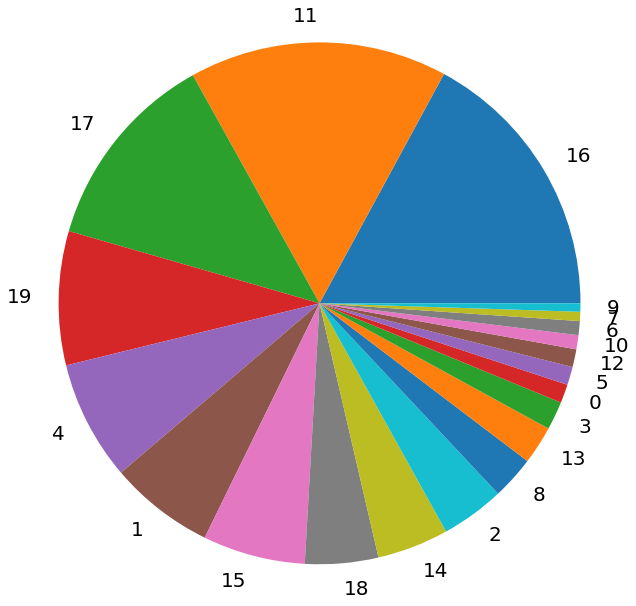

Topic 1 centrality: 0.39393824338912964
Topic 2 centrality: 0.3487686514854431
Topic 3 centrality: 0.3185582160949707
Topic 4 centrality: 0.35493719577789307
Topic 5 centrality: 0.6615915894508362
Topic 6 centrality: 0.29131972789764404
Topic 7 centrality: 0.29485517740249634
Topic 8 centrality: 0.326619029045105
Topic 9 centrality: 0.29185640811920166
Topic 10 centrality: 0.28417691588401794
Topic 11 centrality: 0.44291672110557556
Topic 12 centrality: 0.32906627655029297
Topic 13 centrality: 0.3753886818885803
Topic 14 centrality: 0.351571649312973
Topic 15 centrality: 0.36796024441719055
Topic 16 centrality: 0.37300464510917664
Topic 17 centrality: 0.42336520552635193
Topic 18 centrality: 0.33158454298973083
Topic 19 centrality: 0.39001157879829407


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})
plt.pie(list(big_docs.value_counts("main_topic").values), labels=list(big_docs.value_counts("main_topic").index), radius=3)
plt.show()
for i in range(19):
  print(f"Topic {i + 1} centrality: {big_docs.loc[big_docs['main_topic'] == i + 1]['topic_centrality'].mean()}")

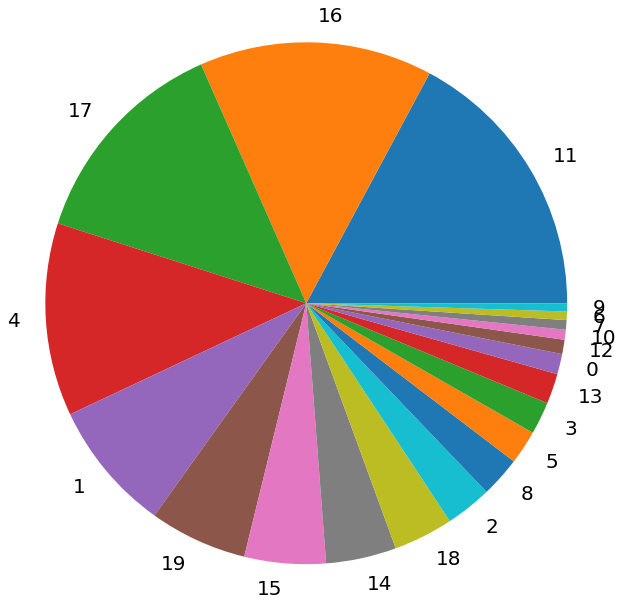

Topic 1 centrality: 0.39717021584510803
Topic 2 centrality: 0.37586864829063416
Topic 3 centrality: 0.3410310447216034
Topic 4 centrality: 0.3866519033908844
Topic 5 centrality: 0.8928129076957703
Topic 6 centrality: 0.3183431625366211
Topic 7 centrality: 0.3229677677154541
Topic 8 centrality: 0.3472547233104706
Topic 9 centrality: 0.30428346991539
Topic 10 centrality: 0.3138405382633209
Topic 11 centrality: 0.45247989892959595
Topic 12 centrality: 0.3751703202724457
Topic 13 centrality: 0.40759414434432983
Topic 14 centrality: 0.3888354003429413
Topic 15 centrality: 0.39373302459716797
Topic 16 centrality: 0.38789165019989014
Topic 17 centrality: 0.4209178686141968
Topic 18 centrality: 0.35763105750083923
Topic 19 centrality: 0.41848987340927124


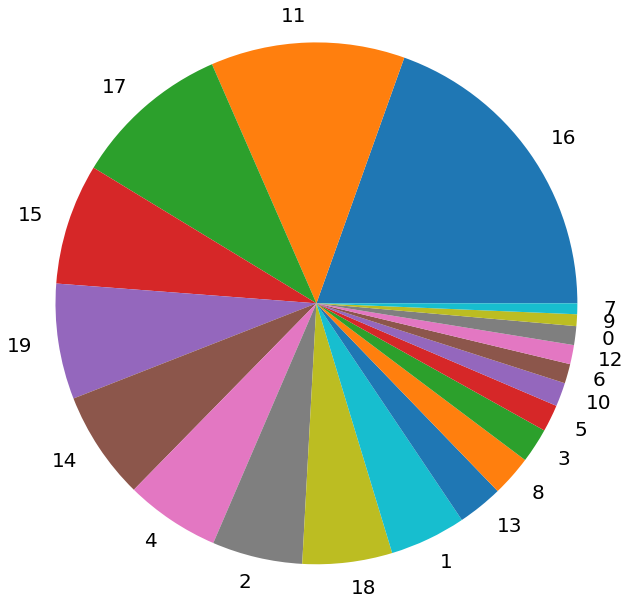

Topic 1 centrality: 0.3700512647628784
Topic 2 centrality: 0.341978520154953
Topic 3 centrality: 0.3068263828754425
Topic 4 centrality: 0.3215378522872925
Topic 5 centrality: 0.41745105385780334
Topic 6 centrality: 0.28024402260780334
Topic 7 centrality: 0.2900186777114868
Topic 8 centrality: 0.3013846278190613
Topic 9 centrality: 0.29395991563796997
Topic 10 centrality: 0.27286091446876526
Topic 11 centrality: 0.4191547632217407
Topic 12 centrality: 0.28345736861228943
Topic 13 centrality: 0.36245375871658325
Topic 14 centrality: 0.33243247866630554
Topic 15 centrality: 0.35653239488601685
Topic 16 centrality: 0.3566358983516693
Topic 17 centrality: 0.389780193567276
Topic 18 centrality: 0.3165348768234253
Topic 19 centrality: 0.359098345041275


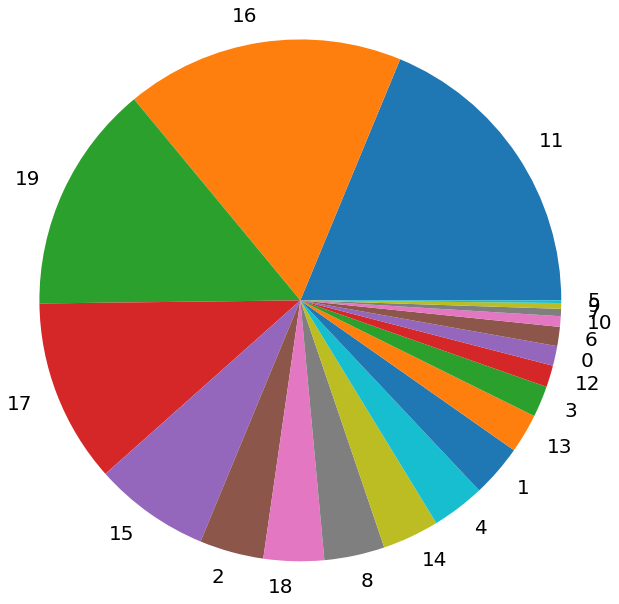

Topic 1 centrality: 0.3818804621696472
Topic 2 centrality: 0.3401516377925873
Topic 3 centrality: 0.32045334577560425
Topic 4 centrality: 0.32942715287208557
Topic 5 centrality: 0.29595494270324707
Topic 6 centrality: 0.2982419431209564
Topic 7 centrality: 0.2752465307712555
Topic 8 centrality: 0.3320217728614807
Topic 9 centrality: 0.2880837023258209
Topic 10 centrality: 0.3089420199394226
Topic 11 centrality: 0.4524023234844208
Topic 12 centrality: 0.3320502042770386
Topic 13 centrality: 0.3738739490509033
Topic 14 centrality: 0.355833500623703
Topic 15 centrality: 0.35548484325408936
Topic 16 centrality: 0.37710949778556824
Topic 17 centrality: 0.43582454323768616
Topic 18 centrality: 0.32443124055862427
Topic 19 centrality: 0.3995635211467743


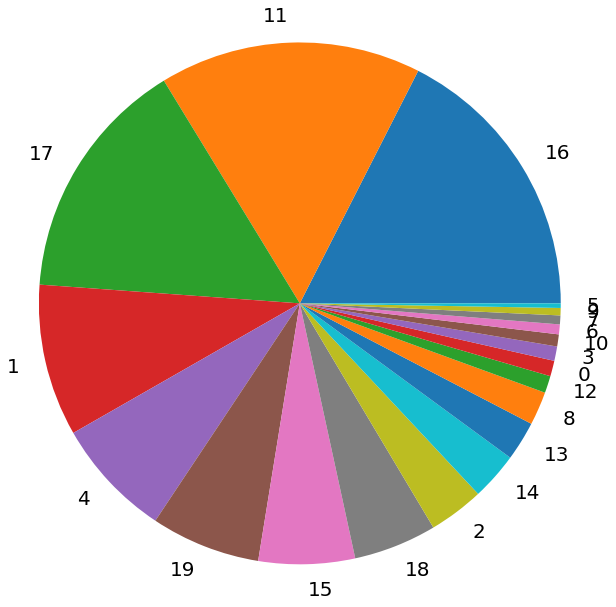

Topic 1 centrality: 0.4068744480609894
Topic 2 centrality: 0.3426516354084015
Topic 3 centrality: 0.28474292159080505
Topic 4 centrality: 0.3324893116950989
Topic 5 centrality: 0.33210575580596924
Topic 6 centrality: 0.274468332529068
Topic 7 centrality: 0.2798596918582916
Topic 8 centrality: 0.320687860250473
Topic 9 centrality: 0.2749258875846863
Topic 10 centrality: 0.2589922547340393
Topic 11 centrality: 0.439475953578949
Topic 12 centrality: 0.33365392684936523
Topic 13 centrality: 0.36321720480918884
Topic 14 centrality: 0.327750027179718
Topic 15 centrality: 0.37085092067718506
Topic 16 centrality: 0.373931884765625
Topic 17 centrality: 0.43998855352401733
Topic 18 centrality: 0.3311469554901123
Topic 19 centrality: 0.3760261535644531


In [ ]:

for sr in ['Emory','gatech','GaState','jhu']:
  big_docs0 = big_docs.loc[big_docs['subreddit'] == sr]
  plt.rcParams.update({'font.size': 20})
  plt.pie(list(big_docs0.value_counts("main_topic").values), labels=list(big_docs0.value_counts("main_topic").index), radius=3)
  plt.show()
  for i in range(19):
    print(f"Topic {i + 1} centrality: {big_docs0.loc[big_docs0['main_topic'] == i + 1]['topic_centrality'].mean()}")

In [ ]:
sr_list = ['emory','gatech','gastate','jhu']
kolenki = ['all_awardings', 'archived', 'associated_award', 'author',
       'author_flair_background_color', 'author_flair_css_class',
       'author_flair_richtext', 'author_flair_template_id',
       'author_flair_text', 'author_flair_text_color', 'author_flair_type',
       'author_fullname', 'author_patreon_flair', 'author_premium', 'body',
       'body_sha1', 'can_gild', 'collapsed', 'collapsed_because_crowd_control',
       'collapsed_reason', 'collapsed_reason_code', 'comment_type',
       'controversiality', 'created_utc', 'distinguished', 'gilded',
       'gildings', 'id', 'is_submitter', 'link_id', 'locked', 'no_follow',
       'parent_id', 'permalink', 'retrieved_utc', 'score', 'score_hidden',
       'send_replies', 'stickied', 'subreddit', 'subreddit_id',
       'subreddit_name_prefixed', 'subreddit_type', 'top_awarded_type',
       'total_awards_received', 'treatment_tags', 'unrepliable_reason',
       'created', 'edited', 'author_cakeday', 'awarders', 'retrieved_on',
       'steward_reports', 'updated_utc', 'author_created_utc', 'nest_level',
       'reply_delay', 'user_removed', 'rte_mode', 'mod_removed']
posts = pd.DataFrame(columns = kolenki)
start_epoch=int(dt.datetime(2015, 1, 1).timestamp())
end_epoch=int(dt.datetime(2022, 11, 17).timestamp())
for sr in sr_list:
  i = 1
  api_request_generator = api.search_comments(subreddit=sr, after = start_epoch, before=end_epoch, limit=20000)
  for submission in api_request_generator:
    print(f"{sr} comment #{i}")
    print(submission.body)
    i += 1
    posts.loc[len(posts)] = submission.d_
    print(f"Progress: {100 * (len(posts)/80000.00)}% done")
posts.to_csv("post_data.csv")

In [ ]:
topics_by_subreddit = pd.DataFrame(columns = ["Emory","gatech","GaState","jhu"])
for i in range(19):
  big_docs_topic = big_docs.loc[(big_docs['main_topic'] == i)]
  topics_by_subreddit.loc[i] = big_docs_topic['subreddit'].value_counts().tolist()
topics_by_subreddit.index += 1
topics_by_subreddit

,Emory,gatech,GaState,jhu
1,143,117,106,93
2,921,908,474,282
3,562,345,330,325
4,228,216,168,86
5,1355,713,589,286
6,238,168,27,14
7,121,103,60,59
8,67,67,53,39
9,325,283,254,200
10,73,57,44,31


In [ ]:
def post_covid(day):
  covid_day = datetime.date(2020,3,16)
  if(day > covid_day):  return True
  else: return False
  

In [ ]:
post_covide = list()
for i in range(len(big_docs)):
  post_covide.append(post_covid(datetime.date.fromtimestamp(big_docs.iloc[i]['created_utc'])))
big_docs.insert(len(big_docs.columns),"post_covid",post_covide)

In [ ]:
earliest = big_docs.sort_values('created_utc').loc[len(posts) - 1]['created_utc']
print(datetime.date.fromtimestamp(earliest))

2021-02-24


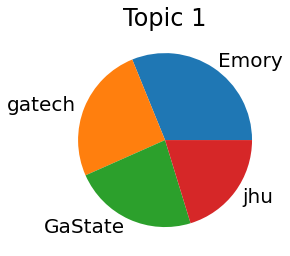

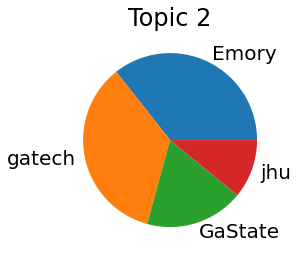

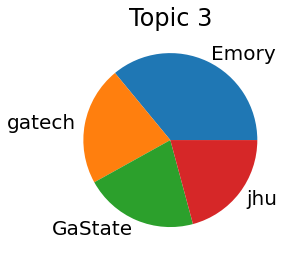

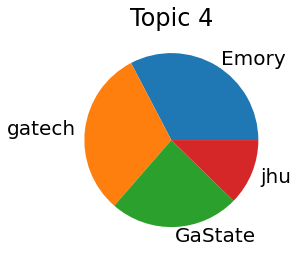

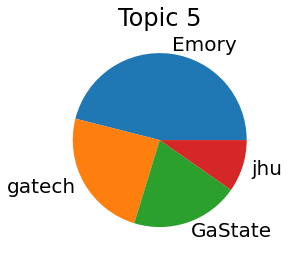

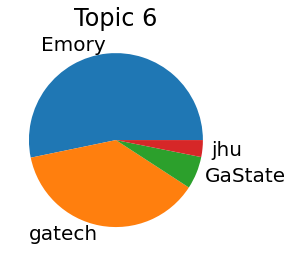

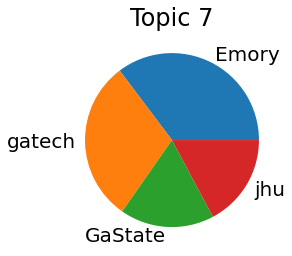

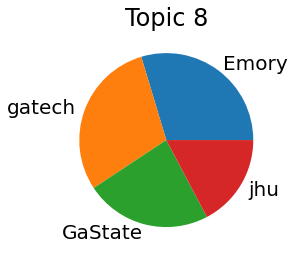

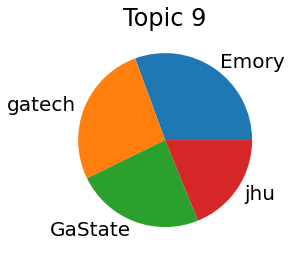

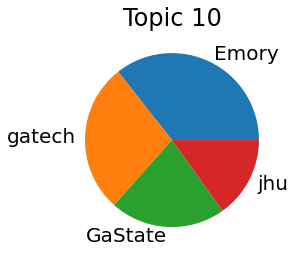

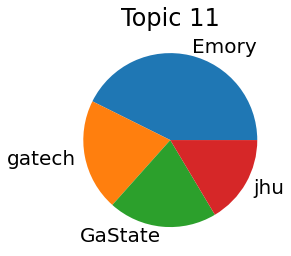

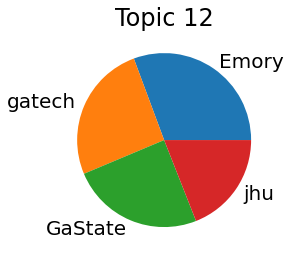

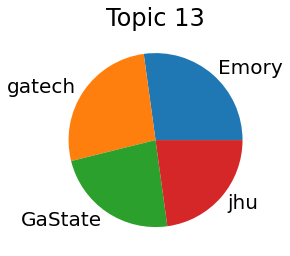

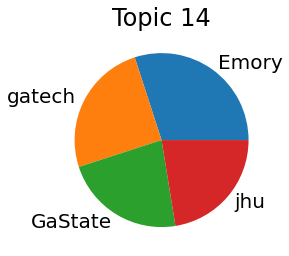

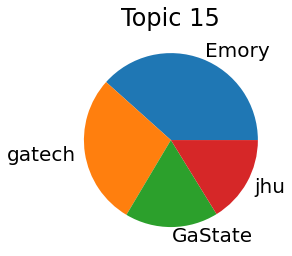

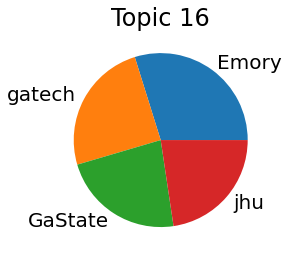

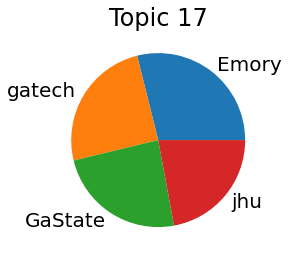

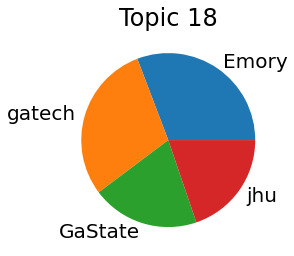

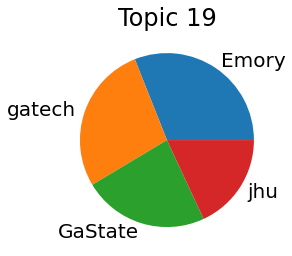

In [ ]:
for i in range(19):
  plt.pie(topics_by_subreddit.loc[i + 1], labels = topics_by_subreddit.columns)
  plt.title("Topic " + str(i + 1))
  plt.show()

Sentiment analysis

In [ ]:
pip install --user -U nltk

In [ ]:
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from nltk import word_tokenize, sent_tokenize
import re
import seaborn as sns
nltk.download('vader_lexicon')

In [ ]:
nltk.download('stopwords')

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
sid = SentimentIntensityAnalyzer()

In [ ]:
#Looking at all of the columns
posts.columns

Index(['Unnamed: 0', 'all_awardings', 'archived', 'associated_award', 'author',
       'author_flair_background_color', 'author_flair_css_class',
       'author_flair_richtext', 'author_flair_template_id',
       'author_flair_text', 'author_flair_text_color', 'author_flair_type',
       'author_fullname', 'author_patreon_flair', 'author_premium', 'body',
       'body_sha1', 'can_gild', 'collapsed', 'collapsed_because_crowd_control',
       'collapsed_reason', 'collapsed_reason_code', 'comment_type',
       'controversiality', 'created_utc', 'distinguished', 'gilded',
       'gildings', 'id', 'is_submitter', 'link_id', 'locked', 'no_follow',
       'parent_id', 'permalink', 'retrieved_utc', 'score', 'score_hidden',
       'send_replies', 'stickied', 'subreddit', 'subreddit_id',
       'subreddit_name_prefixed', 'subreddit_type', 'top_awarded_type',
       'total_awards_received', 'treatment_tags', 'unrepliable_reason',
       'created', 'edited', 'author_cakeday', 'awarders', 'retrieve

Possibly look at the score of each

In [ ]:
columns_drop = ['Unnamed: 0', 'all_awardings', 'archived', 'associated_award', 'author',
       'author_flair_background_color', 'author_flair_css_class',
       'author_flair_richtext', 'author_flair_template_id',
       'author_flair_text', 'author_flair_text_color', 'author_flair_type',
       'author_fullname', 'author_patreon_flair', 'author_premium',
       'body_sha1', 'can_gild', 'collapsed', 'collapsed_because_crowd_control',
       'collapsed_reason', 'collapsed_reason_code', 'comment_type',
       'controversiality', 'created_utc', 'distinguished', 'gilded',
       'gildings', 'id', 'is_submitter', 'link_id', 'locked', 'no_follow',
       'parent_id', 'permalink', 'retrieved_utc', 'score_hidden',
       'send_replies', 'stickied', 'subreddit_id',
       'subreddit_name_prefixed', 'subreddit_type', 'top_awarded_type',
       'total_awards_received', 'treatment_tags', 'unrepliable_reason',
       'created', 'edited', 'author_cakeday', 'awarders', 'retrieved_on',
       'steward_reports', 'updated_utc', 'author_created_utc', 'nest_level',
       'reply_delay', 'user_removed', 'rte_mode', 'mod_removed']

In [ ]:
prada = big_docs


In [ ]:
prada = pd.DataFrame(prada.drop(columns_drop,axis = 1,inplace=False))

In [ ]:
#Change all of comments to type string
prada['body'] = prada['body'].astype(str)

In [ ]:
#lowercasing all 
prada['body'] = prada['body'].apply(lambda x: " ".join(x.lower() for x in x.split()))
#prada['body'] = prada['body'].str.replace('[^ws]','')


['- go really early. 10 ideal. earlier better - don’t go evening except thursday friday nights—those good since people going out.',
 'actually go weekdays 10-11:15am classes end. usually terribly busy benches. squat racks 50/50 finding available one immediately.',
 'difficult all. honestly like psych classes think made 96 class. probably depends professor, find hard definitely easier psych class took.',
 'tbh best bet either early morning late night former wayyy less busy. adapt get daily sets easily',
 'woodruff residential center workout room 2nd floor that’s literally never busy. barbells plenty dumbbells.']

In [ ]:
#Time to say bye bye to stop words

stop = stopwords.words('english')
prada['dropped_body'] = prada['body'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [ ]:
polarity = prada['dropped_body'].apply(lambda x: sid.polarity_scores(x)).apply(pd.Series)
for colum in polarity.columns:
  prada[colum] = polarity[colum]

In [ ]:
main_topic = list()
topic_centrality = list()
for _, row in prada.iterrows():
  proportions = row['proportions']
  keys = list(proportions.keys())
  values = list(proportions.values())
  imax = values.index(max(values))
  max_topic, max_component = keys[imax], values[imax]
  main_topic.append(max_topic)
  topic_centrality.append(max_component)
prada['main_topic'] = main_topic
prada['topic_centrality'] = topic_centrality

In [ ]:
print(prada.iloc[5]['proportions'])
prada.iloc[5][['main_topic','topic_centrality']]

{1: 0.09935125, 2: 0.046883054, 11: 0.3015204, 12: 0.05043867, 17: 0.47296047}


main_topic               17
topic_centrality    0.47296
Name: 11, dtype: object

In [ ]:
outcomes = ['negative','neutral','positive']
sentiment = list()
for _, post in prada.iterrows():
  prada_score =   list(sid.polarity_scores(post['dropped_body']).values())[:-1]
  imax = prada_score.index(max(prada_score))
  sentiment.append(outcomes[imax])
prada['sentiment'] = sentiment
prada.to_csv("prada_big_docs.csv")

In [ ]:
len(prada.loc[prada['sentiment'] == 'negative'])

155

In [ ]:
topic_sentiments = list()
for i in range(20):
  sentiment = 0
  topic_posts = prada.loc[(prada['main_topic'] == i) & (prada['sentiment'] != 'neutral')]
  for _, post in topic_posts.iterrows():
    sentiment += 1 if post['sentiment'] == 'positive' else -1
  if len(prada.loc[(prada['main_topic'] == i) & (prada['sentiment'] != 'neutral')]) == 0:
    topic_sentiments.append(0)
  else:
    topic_sentiments.append(sentiment / len(prada.loc[(prada['main_topic'] == i) & (prada['sentiment'] != 'neutral')]))
for x in range(len(topic_sentiments)):
  print(f"Topic {x} sentiment: {str(topic_sentiments[x])[:9]}")


Topic 0 sentiment: 0.9809523
Topic 1 sentiment: 0.9615384
Topic 2 sentiment: 0.76
Topic 3 sentiment: 0.8181818
Topic 4 sentiment: 0.7173913
Topic 5 sentiment: -0.142857
Topic 6 sentiment: 0.0
Topic 7 sentiment: 0.2
Topic 8 sentiment: 0.72
Topic 9 sentiment: 0.3846153
Topic 10 sentiment: 0.5714285
Topic 11 sentiment: 0.88
Topic 12 sentiment: -0.272727
Topic 13 sentiment: 0.75
Topic 14 sentiment: 0.8651685
Topic 15 sentiment: 0.9166666
Topic 16 sentiment: 0.7487684
Topic 17 sentiment: 0.8541666
Topic 18 sentiment: 0.8108108
Topic 19 sentiment: 0.8372093


98